# Dow Jones Industrial Average (DJIA) Prediction
# - without Social Media information
## Given: 
    12 months Date(T), Company Name, Stock Price, DJIA

## Task:
###    Given data from Aug 1, 2016 to Nov 30, 2017
###    Split data to
    1. Training set from Aug 1, 2016 to Jul 31, 2017
    2. Validation set from Aug 1, 2017 to Sep 17, 2017
    
###    To Predict T+1 and T+30 of DJIA  in next 1 months (Sep 18, 2017 to Oct 18, 2017).
    
## Data Sources:
### a. Yahoo Finance 30 companies stock price + DJIA

for 30 companies
format=>No. company: facebook id
1. 3M: 3m
2. American Express: AmericanExpressUS
3. Apple: AppleInc.HD
4. Boeing: Boeing
5. Caterpillar: caterpillar
6. Chevron: Chevron
7. Cisco Systems: Cisco
8. Coca-Cola: CocaColaUnitedStates
9. DowDuPont: dupontco
10. ExxonMobil: ExxonMobil
11. General Electric: GE
12. Goldman Sachs:goldmansachs
13. IBM: ibm
14. Intel: Intel
15. Johnson & Johnson: jnj
16. JPMorgan Chase: jpmorganchase
17. McDonald's: McDonaldsUS
18. Merck: MerckInvents
19. Microsoft: Microsoft
20. Nike: Nike, nikesportswear
21. Pfizer: Pfizer
22. Procter & Gamble: proctergamble
23. The Home Depot: homedepot
24. Travelers: travelers
25. United Technologies: unitedtechnologiescorp
26. UnitedHealth Group: unitedhealthgroup
27. Verizon: Verizon
28. Visa: VisaUnitedStates
29. Walmart: Walmart
30. Walt Disney: Disney

Query target string: 3m, AmericanExpressUS, AppleInc.HD, Boeing, caterpillar, Chevron, Cisco, CocaColaUnitedStates, dupontco, ExxonMobil, GE, goldmansachs, ibm, Intel, jnj, jpmorganchase, McDonaldsUS, MerckInvents, Microsoft, Nike, nikesportswear, Pfizer, proctergamble, homedepot, travelers, unitedtechnologiescorp, unitedhealthgroup, Verizon, VisaUnitedStates, Walmart, Disney


In [5]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Read training and test data

In [7]:
dataset = pd.read_csv('integrated_data-simple.csv', encoding = "utf-8", parse_dates=["date"],
date_parser=lambda x: pd.to_datetime(x, format="%Y%m%d %H:%M:%S"))
# convert date to int
dataset['date']=dataset['date'].dt.strftime('%Y%m%d')
dataset.set_index(['date', 'company'], inplace=True)
dataset = dataset.sort_index()

In [8]:
dataset.head(5)

open        high         low       close  \
date     company                                                            
20160801 3M                177.080002  178.539993  177.080002  178.289993   
         American Express   64.489998   64.739998   63.959999   64.129997   
         Apple             104.410004  106.150002  104.410004  106.050003   
         Boeing            133.210007  134.229996  132.699997  133.210007   
         Caterpillar        82.760002   82.879997   81.529999   81.949997   

                            adj close    volume  
date     company                                 
20160801 3M                172.017365   1598400  
         American Express   62.797729   2913900  
         Apple             103.278984  38167900  
         Boeing            127.552055   3067300  
         Caterpillar        78.857796   3377100

In [9]:
dataset.tail(5)

open        high         low       close  \
date     company                                                              
20171130 UnitedHealth Group  223.830002  228.750000  222.289993  228.169998   
         Verizon              50.000000   51.090000   49.990002   50.889999   
         Visa                110.500000  112.589996  110.029999  112.589996   
         Walmart              98.089996   98.440002   96.510002   97.230003   
         Walt Disney         105.360001  105.709999  104.470001  104.820000   

                              adj close    volume  
date     company                                   
20171130 UnitedHealth Group  228.169998   6681900  
         Verizon              50.889999  31764000  
         Visa                112.589996  18053200  
         Walmart              97.230003  12001400  
         Walt Disney         104.820000   9033800

## Select the features for the model.
### stock close price, facebook likes, facebook dislike, twitte likes

In [10]:
# Features selection
X = dataset.loc[:, ['open','high','low', 'close','volume']]

# Get DJIA close index price
djia = dataset.loc[(dataset.index.get_level_values('company') == 'DJIA')]
djia = djia.loc[:,['close']]

X.head(5)    

open        high         low       close  \
date     company                                                            
20160801 3M                177.080002  178.539993  177.080002  178.289993   
         American Express   64.489998   64.739998   63.959999   64.129997   
         Apple             104.410004  106.150002  104.410004  106.050003   
         Boeing            133.210007  134.229996  132.699997  133.210007   
         Caterpillar        82.760002   82.879997   81.529999   81.949997   

                             volume  
date     company                     
20160801 3M                 1598400  
         American Express   2913900  
         Apple             38167900  
         Boeing             3067300  
         Caterpillar        3377100

In [11]:
djia.head(5)

,,close
date,company,
20160801,DJIA,18404.50977
20160802,DJIA,18313.76953
20160803,DJIA,18355.00000
20160804,DJIA,18352.05078
20160805,DJIA,18543.52930


In [12]:
# get y value for close(T+1) and close(T+30)
_tmp = djia
djia['T+1'] = _tmp['close'].shift(-1)
djia['T+30'] = _tmp['close'].shift(-30)
djia.tail(31)   

,,close,T+1,T+30
date,company,,,
20171018,DJIA,23157.59961,23163.03906,24272.34961
20171019,DJIA,23163.03906,23328.63086,NaN
20171020,DJIA,23328.63086,23273.96094,NaN
20171023,DJIA,23273.96094,23441.75977,NaN
20171024,DJIA,23441.75977,23329.46094,NaN
20171025,DJIA,23329.46094,23400.85938,NaN
20171026,DJIA,23400.85938,23434.18945,NaN
20171027,DJIA,23434.18945,23348.74023,NaN
20171030,DJIA,23348.74023,23377.24023,NaN


In [13]:
# shift training data 30 day with 30 stocks + 1 DJIA
# Get Total data set from Aug 1, 2016 to Oct 18, 2017
total_row = len(X)
data_range = total_row -(30*31)
_tmpX = X.head(data_range)
_tmpX.head(5)
_tmpX.tail(5)
X = _tmpX
X.head(5)

open        high         low       close  \
date     company                                                            
20160801 3M                177.080002  178.539993  177.080002  178.289993   
         American Express   64.489998   64.739998   63.959999   64.129997   
         Apple             104.410004  106.150002  104.410004  106.050003   
         Boeing            133.210007  134.229996  132.699997  133.210007   
         Caterpillar        82.760002   82.879997   81.529999   81.949997   

                             volume  
date     company                     
20160801 3M                 1598400  
         American Express   2913900  
         Apple             38167900  
         Boeing             3067300  
         Caterpillar        3377100

In [14]:
# drop NaN rows.
djia = djia.dropna()
# X = X.dropna()
djia.tail(5)
# X.tail(5)

,,close,T+1,T+30
date,company,,,
20171012,DJIA,22841.00977,22871.72070,23557.99023
20171013,DJIA,22871.72070,22956.96094,23580.77930
20171016,DJIA,22956.96094,22997.43945,23836.71094
20171017,DJIA,22997.43945,23157.59961,23940.67969
20171018,DJIA,23157.59961,23163.03906,24272.34961


In [15]:

# Calculate the trend on T+1 and T+30
y = []

for index, row in djia.iterrows():
    _tmp = []
    if (row['T+1']-row['close'] > 0):
        _tmp.append('1')
    else:
        _tmp.append('0')
    if (row['T+30']-row['close'] > 0):
        _tmp.append('1')
    else:
        _tmp.append('0')   
    y.append(_tmp)
    
#djia.head(5)
y[0:10]

[['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0'],
 ['0', '0'],
 ['1', '0']]

## Remove company name from dataset

In [16]:
from sklearn.model_selection import train_test_split

x = X.reset_index()
x = x.as_matrix()
x = np.delete(x, np.s_[1:2], axis=1) #Remove company
x.shape
#x

#############
# data = x.reshape(308, 31, 6)
# data
# y = np.array(y)

# # # data.shape
# _X_train, X_test, _y_train, y_test = train_test_split(data, y, test_size = 0.072, shuffle = False, stratify = None)
# _X_train.shape

(9548, 6)

## Standardization¶

In [17]:
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler(feature_range=(0,1)) # default (0, 1) for sigmoid function
mmc.fit(x)
x_std = mmc.transform(x)
x_std

array([[ 0.        ,  0.00668093,  0.00671495,  0.00668794,  0.00671332,
         0.00164407],
       [ 0.        ,  0.00179933,  0.00179915,  0.0017833 ,  0.00177872,
         0.00382692],
       [ 0.        ,  0.00353016,  0.00358793,  0.00353713,  0.00359072,
         0.06232498],
       ..., 
       [ 1.        ,  0.00366933,  0.00366784,  0.00366937,  0.00366637,
         0.00698529],
       [ 1.        ,  0.00273845,  0.0027335 ,  0.00273934,  0.00273357,
         0.00807182],
       [ 1.        ,  0.00326784,  0.00325704,  0.00323969,  0.00325357,
         0.00795931]])

###  Reshape Data to time, companies+DJIA, and 5 features after Standarlization

In [18]:
data = x_std.reshape(308, 31, 6)
data
y = np.array(y)

# # data.shape
_X_train, X_test_std, _y_train, y_test = train_test_split(data, y, test_size = 0.072, shuffle = False, stratify = None)
# _X_train

## Prepare training & validation set

In [19]:
from sklearn.model_selection import train_test_split
# Create training and validation sets
X_train_std, X_validate_std, y_train, y_validate = train_test_split(_X_train, _y_train, test_size = 0.115, shuffle = False, stratify = None)
# X_validate_std[1]

In [20]:
X_train_std.shape

(252, 31, 6)

## Build model: LSTM for this prediction

### LSTM Model - stateful

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, TimeDistributed, LSTM, GRU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback

def create_LSTM_model(optimizer='adam', kernel_init='normal', recurrent_init='normal', bias_init='zero', batch_size=1):
    model = Sequential()
    #input method: batch_input_shape=(batch, timesteps/lags, features)
    #  or input_shape=(timesteps/lags, features) , model.fit(X, y, epochs=n, batch_size=b, verbose=2)
    model.add(LSTM(128, batch_input_shape=(batch_size, 31, 6), return_sequences=True, activation='sigmoid', recurrent_activation='hard_sigmoid', use_bias=True, 
                   kernel_initializer=kernel_init, recurrent_initializer=recurrent_init, bias_initializer=bias_init,
                   unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, 
                   activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
                   dropout=0.0, recurrent_dropout=0.0, implementation=1, return_state=False, 
                   go_backwards=False, stateful=False, unroll=False))
    model.add(Dropout(0.2))
    model.add(LSTM(64, return_sequences=True, activation='sigmoid', recurrent_activation='hard_sigmoid', use_bias=True, 
                   kernel_initializer=kernel_init, recurrent_initializer=recurrent_init, bias_initializer=bias_init, unit_forget_bias=True, 
                   kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                   kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                   implementation=1, return_state=False, go_backwards=False, stateful=False, unroll=False))
    model.add(Dropout(0.2))
    # The last layer of LSTM, return_sequences = False
    model.add(LSTM(32, return_state=False, activation='sigmoid', recurrent_activation='hard_sigmoid', use_bias=True, 
                   kernel_initializer=kernel_init, recurrent_initializer=recurrent_init, bias_initializer=bias_init, unit_forget_bias=True, 
                   kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
                   kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, 
                   implementation=1, return_sequences=False, go_backwards=False, stateful=False, unroll=False))
    model.add(Dropout(0.2))    
    model.add(Dense(2, activation='sigmoid', kernel_initializer=kernel_init))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
X_3D_train_std = X_train_std
X_3D_train_std.shape

(252, 31, 6)

## Train the model

In [35]:
# Parameters
from keras.optimizers import Adam
# adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) #default
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
optimizers = adam
kernel_init = 'glorot_uniform'
recurrent_init = 'glorot_uniform'
bias_init ='zero'
epochs = 20
batches = 1

model_LSTM = create_LSTM_model(optimizer=optimizers, batch_size=batches, kernel_init=kernel_init, 
                 recurrent_init=recurrent_init, bias_init=bias_init)
model_LSTM.fit(X_3D_train_std, y_train,
          epochs=epochs,
          batch_size=batches,
          shuffle=False,
          validation_data=(X_validate_std, y_validate),
          callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, mode='auto'),
          ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001, verbose=1, mode='auto')])

Train on 252 samples, validate on 33 samples
Epoch 1/20
252/252 [==============================] - 34s - loss: 0.6499 - acc: 0.6210 - val_loss: 0.4589 - val_acc: 0.8485
Epoch 2/20
252/252 [==============================] - 15s - loss: 0.6113 - acc: 0.6488 - val_loss: 0.4272 - val_acc: 0.6515
Epoch 3/20
252/252 [==============================] - 12s - loss: 0.6176 - acc: 0.6349 - val_loss: 0.4195 - val_acc: 0.8485
Epoch 4/20
252/252 [==============================] - 12s - loss: 0.6266 - acc: 0.6349 - val_loss: 0.4217 - val_acc: 0.8485
Epoch 5/20
252/252 [==============================] - 11s - loss: 0.6278 - acc: 0.6131 - val_loss: 0.4242 - val_acc: 0.8485
Epoch 6/20
250/252 [============================>.] - ETA: 0s - loss: 0.6251 - acc: 0.6340
Epoch 00005: reducing learning rate to 0.00020000000949949026.
252/252 [==============================] - 12s - loss: 0.6238 - acc: 0.6329 - val_loss: 0.4255 - val_acc: 0.8485
Epoch 7/20
252/252 [==============================] - 12s - loss: 0.

### Save the model

In [25]:
import datetime
model_filename = 'simple-lstm_trained_model'+datetime.datetime.now().strftime("%Y%m%d%H%M")+'.h5'
model_LSTM.save(model_filename)

### Load previous trained model if required.

In [34]:
from keras.models import load_model
model_LSTM = load_model('simple-lstm_trained_model201712050733-.h5')

## Test on testing set

In [36]:
y_result = model_LSTM.predict(X_test_std, batch_size=batches)

## 10. Results without Social Info: T+1 growth up Pr(51.4%), T+30 growth up Pr(83.7%) 

In [37]:
y_result

array([[ 0.51392549,  0.83705753],
       [ 0.51392549,  0.83705759],
       [ 0.51392549,  0.83705753],
       [ 0.51392537,  0.83705747],
       [ 0.51392549,  0.83705753],
       [ 0.51392555,  0.83705747],
       [ 0.51392549,  0.83705747],
       [ 0.51392549,  0.83705747],
       [ 0.51392555,  0.83705747],
       [ 0.51392561,  0.83705747],
       [ 0.51392573,  0.83705717],
       [ 0.51392573,  0.83705717],
       [ 0.51392567,  0.83705717],
       [ 0.51392561,  0.83705729],
       [ 0.51392567,  0.83705729],
       [ 0.51392573,  0.83705729],
       [ 0.51392591,  0.83705729],
       [ 0.51392585,  0.83705729],
       [ 0.51392597,  0.83705717],
       [ 0.51392579,  0.83705729],
       [ 0.51392573,  0.83705729],
       [ 0.51392573,  0.83705729],
       [ 0.51392573,  0.83705729]], dtype=float32)

In [59]:
y_test

array([['1', '1'],
       ['1', '1'],
       ['0', '1'],
       ['0', '1'],
       ['0', '1'],
       ['0', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['0', '1'],
       ['0', '1'],
       ['1', '1'],
       ['1', '1'],
       ['0', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1'],
       ['1', '1']], 
      dtype='<U1')

In [38]:
from sklearn import metrics
threshold = 0.5
y_result = np.where(y_result >= threshold, 1, 0)

t1r = list(map(int,y_result[:,0]))
t30r = list(map(int,y_result[:,1]))
t1t = list(map(int,y_test[:,0]))
t30t = list(map(int,y_test[:,1]))

print('T+1 report\n %s'%(metrics.classification_report(t1r, t1t)))
print('T+30 report\n %s'%(metrics.classification_report(t30r, t30t)))

T+1 report
              precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.70      0.82        23

avg / total       1.00      0.70      0.82        23

T+30 report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        23

avg / total       1.00      1.00      1.00        23



Confusion matrix, without normalization
[[ 0  7]
 [ 0 16]]


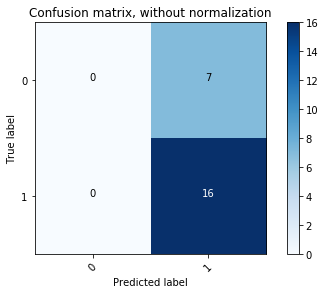

In [39]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['0','1']
# Compute confusion matrix
cnf_matrix = confusion_matrix(t1t, t1r)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()